In [1]:
from google.colab import drive
drive.mount('/content/drive')
project_dir = '/content/drive/MyDrive/10C51_Project'

Mounted at /content/drive


In [2]:
import os
import numpy as np
from statistics import mean


def get_rmsd_values(acqf, max_loop):

    linkers = []
    rmsds = []

    rmsd_dir = project_dir+f'/rmsd/{acqf}/'

    for loop in range(max_loop+1):
        with open (rmsd_dir+f'{acqf}_loop_{loop}_rmsd_values.txt', 'r') as file:
            linker = []
            rmsd = []

            for line in file:
                X, y = line.split('\t')
                linkers.append( X)
                rmsds.append(float(y))

    #print(len(linkers))
    #print(len(rmsds))
    
    return linkers, rmsds

def sort_linkers_and_rmsds(linkers, rmsds):
    sorted_linkers = []
    sorted_rmsds = []

    # loop_num = 0 for the initial set
    for loop_num in range(int(len(linkers)/100)):
        linker_list = linkers[:(loop_num+1)*100]
        rmsd_list = rmsds[:(loop_num+1)*100]
        #print(len(linker_list))
        pairs = list(zip(linker_list, rmsd_list))

        # sort the list of tuples based on the second element (rmsd value)
        sorted_pairs = sorted(pairs, key=lambda x: x[1])

        # unzip the sorted tuples back into separate linker and rmsd lists
        sorted_linker_list, sorted_rmsd_list = zip(*sorted_pairs)

        sorted_linkers.append(list(sorted_linker_list))
        sorted_rmsds.append(list(sorted_rmsd_list))

    #print(len(sorted_linkers[0]))
    #print(len(sorted_rmsds[0]))
    
    return sorted_linkers, sorted_rmsds


In [5]:
acqfs = ['random', 'greedy', 'epsgreedy', 'UCB']
max_loop = 4

k_vals = [1, 2, 5, 10, 25, 50, 100]
top_k_dicts = {}
for k in k_vals:
  top_k_dict = {}
  for acqf in acqfs:
      linkers, rmsds = get_rmsd_values(acqf, max_loop)
      sorted_linkers, sorted_rmsds = sort_linkers_and_rmsds(linkers, rmsds)
      top_k_avg = []
      print(f"{acqf}")
      for i in range(len(sorted_rmsds)):
          top_k_avg.append(mean(sorted_rmsds[i][:k]))
          print(f"\tLoop {i} top {k} average: {top_k_avg[-1]}")
      top_k_dict[acqf] = top_k_avg
  top_k_dicts[k] = top_k_dict

random
	Loop 0 top 1 average: 8.385831842589521
	Loop 1 top 1 average: 8.385831842589521
	Loop 2 top 1 average: 8.385831842589521
	Loop 3 top 1 average: 8.385831842589521
	Loop 4 top 1 average: 8.385831842589521
greedy
	Loop 0 top 1 average: 8.385831842589521
	Loop 1 top 1 average: 8.385831842589521
	Loop 2 top 1 average: 8.385831842589521
	Loop 3 top 1 average: 8.385831842589521
	Loop 4 top 1 average: 8.385831842589521
epsgreedy
	Loop 0 top 1 average: 8.385831842589521
	Loop 1 top 1 average: 8.385831842589521
	Loop 2 top 1 average: 8.385831842589521
	Loop 3 top 1 average: 8.385831842589521
	Loop 4 top 1 average: 8.385831842589521
UCB
	Loop 0 top 1 average: 8.385831842589521
	Loop 1 top 1 average: 8.385831842589521
	Loop 2 top 1 average: 8.385831842589521
	Loop 3 top 1 average: 8.385831842589521
	Loop 4 top 1 average: 8.385831842589521
random
	Loop 0 top 2 average: 9.114526594872675
	Loop 1 top 2 average: 9.114526594872675
	Loop 2 top 2 average: 9.114526594872675
	Loop 3 top 2 average:

<Figure size 640x480 with 0 Axes>

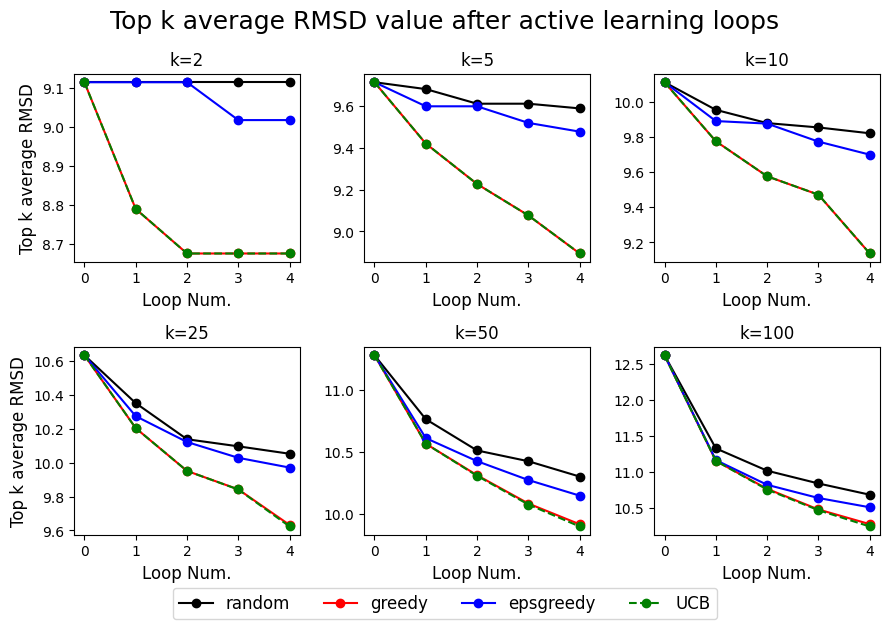

In [ ]:
from matplotlib import figure
import matplotlib.pyplot as plt
plt.clf()
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
color = ['k.-', 'r.-', 'b.-', 'g.--']
for i in range(len(k_vals)):
  for j, acqf in enumerate(acqfs):
    axes[int(i/3)][i-3*int(i/3)].plot(np.arange(0, 5, 1), top_k_dicts[k_vals[i]][acqf], color[j], markersize =12, label = acqf)

  axes[int(i/3)][i-3*int(i/3)].set_xticks(np.arange(0, 5, 1))
  axes[int(i/3)][i-3*int(i/3)].set_title(f"k={k_vals[i]}", fontsize = 12)
  axes[int(i/3)][i-3*int(i/3)].set_xlabel("Loop Num.", fontsize = 12)
axes[0][0].set_ylabel("Top k average RMSD", fontsize = 12)
axes[1][0].set_ylabel("Top k average RMSD", fontsize = 12)
fig.suptitle(f"Top k average RMSD value after active learning loops", fontsize = 18)
handles, labels = axes[int(i/3)][i-3*int(i/3)].get_legend_handles_labels()
fig.legend(handles, labels, ncol=len(labels), loc='lower center', fontsize = 12, bbox_to_anchor=(0.5, -0.05))
fig.tight_layout()
fig.show()